# Лабораторная работа: Геометрические алгоритмы в 2D


## Часть 1: Попадание точки в круг и треугольник

### Задание: Проверка геометрических положений

Реализуйте классы **Point**, **Circle** и **Triangle** для проверки попадания точки в круг и треугольник, аналогично лекции 9.

**Класс Point** хранит координаты `x, y` с методом `__str__`.

**Класс Circle** содержит центр (`Point`) и радиус, с методом для проверки `point_in_circle(point)`.

**Класс Triangle** содержит три вершины (`Point`), с методом `point_in_triangle(point)` на основе векторного произведения (barycentric coordinates).

**Генератор случайных точек** внутри ограничивающего прямоугольника, содержащего фигуры:

Создайте генератор `generate_points(xmin, xmax, ymin, ymax, n)`, который случайно создаёт `n` точек с координатами в данном диапазоне.

**Проверку** для всех сгенерированных точек попадания в круг и треугольник.

**Визуализацию** с помощью matplotlib:

- Отобразите круг и треугольник.
- Отметьте **зелёным** цветом точки, попавшие внутрь фигуры, **красным** — вне.
- Используйте различные маркеры для точек в круге и в треугольнике для наглядности.


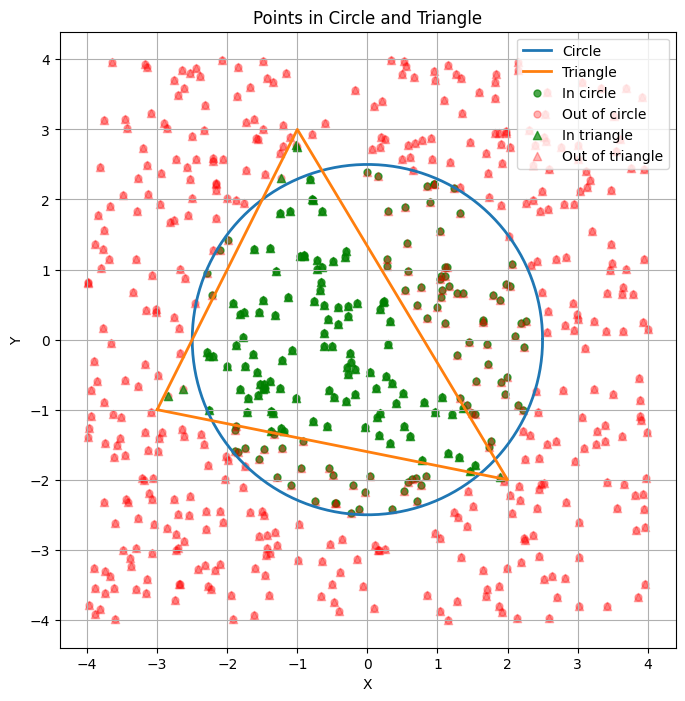

Total points: 600
In circle: 198 | Out of circle: 402
In triangle: 111 | Out of triangle: 489


In [ ]:
import random
from dataclasses import dataclass
import matplotlib.pyplot as plt


@dataclass(frozen=True)
class Point:
    x: float
    y: float

    def __str__(self):
        return f"Point(x={self.x:.3f}, y={self.y:.3f})"


class Circle:
    def __init__(self, center: Point, radius: float):
        self.center = center
        self.radius = radius

    def point_in_circle(self, p: Point) -> bool:
        dx = p.x - self.center.x
        dy = p.y - self.center.y
        return dx * dx + dy * dy <= self.radius * self.radius  # внутри или на границе


class Triangle:
    def __init__(self, a: Point, b: Point, c: Point):
        self.a, self.b, self.c = a, b, c

    @staticmethod
    def _cross(ax, ay, bx, by) -> float:
        # Векторное произведение 2D: (ax, ay) x (bx, by)
        return ax * by - ay * bx

    def point_in_triangle(self, p: Point) -> bool:
        
        a, b, c = self.a, self.b, self.c

        # Векторное произведение для ребра AB и точки P
        abx, aby = b.x - a.x, b.y - a.y
        apx, apy = p.x - a.x, p.y - a.y
        c1 = self._cross(abx, aby, apx, apy)

        # Для ребра BC
        bcx, bcy = c.x - b.x, c.y - b.y
        bpx, bpy = p.x - b.x, p.y - b.y
        c2 = self._cross(bcx, bcy, bpx, bpy)

        # Для ребра CA
        cax, cay = a.x - c.x, a.y - c.y
        cpx, cpy = p.x - c.x, p.y - c.y
        c3 = self._cross(cax, cay, cpx, cpy)

        has_neg = (c1 < 0) or (c2 < 0) or (c3 < 0)
        has_pos = (c1 > 0) or (c2 > 0) or (c3 > 0)

        return not (has_neg and has_pos)  # нет одновременно и + и - => внутри/на границе


def generate_points(xmin, xmax, ymin, ymax, n):
    for _ in range(n):
        yield Point(
            x=random.uniform(xmin, xmax),
            y=random.uniform(ymin, ymax)
        )


def plot_circle(ax, circle: Circle):
    # рисуем окружность параметрически
    import math
    cx, cy, r = circle.center.x, circle.center.y, circle.radius
    ts = [i * 2 * math.pi / 300 for i in range(301)]
    xs = [cx + r * math.cos(t) for t in ts]
    ys = [cy + r * math.sin(t) for t in ts]
    ax.plot(xs, ys, linewidth=2, label="Circle")


def plot_triangle(ax, tri: Triangle):
    xs = [tri.a.x, tri.b.x, tri.c.x, tri.a.x]
    ys = [tri.a.y, tri.b.y, tri.c.y, tri.a.y]
    ax.plot(xs, ys, linewidth=2, label="Triangle")


def main():
    # --- Задаём фигуры (можешь менять под свой вариант) ---
    circle = Circle(center=Point(0, 0), radius=2.5)
    triangle = Triangle(
        Point(-3, -1),
        Point(2, -2),
        Point(-1, 3)
    )

    # --- Ограничивающий прямоугольник (должен покрывать обе фигуры) ---
    xmin, xmax = -4, 4
    ymin, ymax = -4, 4

    # --- Генерируем точки ---
    n = 600
    pts = list(generate_points(xmin, xmax, ymin, ymax, n))

    # --- Проверяем попадание ---
    in_c = [p for p in pts if circle.point_in_circle(p)]
    out_c = [p for p in pts if not circle.point_in_circle(p)]

    in_t = [p for p in pts if triangle.point_in_triangle(p)]
    out_t = [p for p in pts if not triangle.point_in_triangle(p)]

    fig, ax = plt.subplots(figsize=(8, 8))

    plot_circle(ax, circle)
    plot_triangle(ax, triangle)

    # Круг: разные маркеры
    ax.scatter([p.x for p in in_c],  [p.y for p in in_c],  marker="o", s=25, color="green", alpha=0.7, label="In circle")
    ax.scatter([p.x for p in out_c], [p.y for p in out_c], marker="o", s=25, color="red",   alpha=0.3, label="Out of circle")

    # Треугольник: другие маркеры
    ax.scatter([p.x for p in in_t],  [p.y for p in in_t],  marker="^", s=35, color="green", alpha=0.7, label="In triangle")
    ax.scatter([p.x for p in out_t], [p.y for p in out_t], marker="^", s=35, color="red",   alpha=0.3, label="Out of triangle")

    ax.set_title("Points in Circle and Triangle")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True)
    ax.legend(loc="upper right")
    plt.show()

    # Немного статистики в консоль
    print(f"Total points: {n}")
    print(f"In circle: {len(in_c)} | Out of circle: {len(out_c)}")
    print(f"In triangle: {len(in_t)} | Out of triangle: {len(out_t)}")


if __name__ == "__main__":
    main()

## Часть 2: Пересечение отрезков и окружностей

### Задание: Алгоритмы геометрического пересечения

Расширьте систему классов из Части 1 для проверки пересечения отрезков с окружностями и отрезков между собой.

**Класс Segment** содержит две вершины (`Point` A и B), с методами:
- `__str__` для отображения отрезка
- `length()` — вычисление длины отрезка
- `intersects_circle(circle)` — проверка пересечения отрезка с окружностью (возвращает список точек пересечения или пустой список)
- `intersects_segment(other)` — проверка пересечения двух отрезков (возвращает точку пересечения или None)

**Реализация алгоритмов пересечения:**
- **Отрезок ↔ Окружность**: Решение квадратного уравнения для расстояния от центра окружности до отрезка 
- **Отрезок ↔ Отрезок**: Метод на основе векторного произведения и параметризации (ориентация точек) 

**Генератор тестовых конфигураций:**
- `generate_segments(n, xmin, xmax, ymin, ymax)` — генератор n случайных отрезков в прямоугольнике
- Создайте несколько тестовых окружностей и отобразите все возможные случаи пересечения

**Визуализация с помощью matplotlib:**
- Отобразите окружность(и) и множество отрезков
- **Зелёные отрезки** — пересекают окружность (отметьте точки пересечения)
- **Синие отрезки** — полностью внутри окружности
- **Красные отрезки** — полностью вне окружности  
- **Жёлтые точки** — точки пересечения отрезков между собой
- Используйте легенду и сетку для наглядности


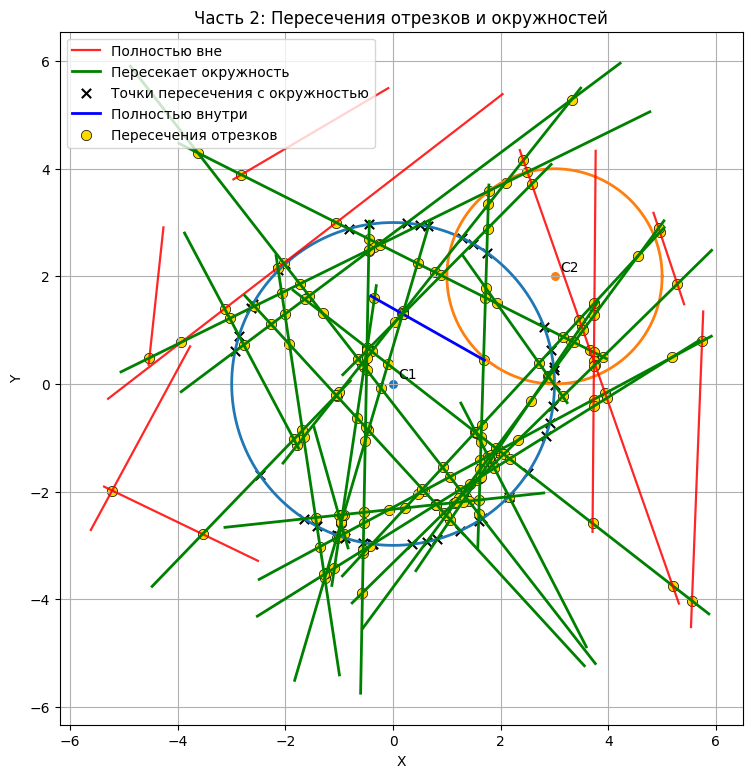

Segments: 35
Segment-segment intersection points: 182


In [ ]:
import random
import math
from dataclasses import dataclass
import matplotlib.pyplot as plt


@dataclass(frozen=True)
class Point:
    x: float
    y: float

    def __str__(self):
        return f"Point({self.x:.3f}, {self.y:.3f})"


class Circle:
    def __init__(self, center: Point, radius: float):
        self.center = center
        self.radius = radius

    def point_in_circle(self, p: Point) -> bool:
        dx = p.x - self.center.x
        dy = p.y - self.center.y
        return dx * dx + dy * dy <= self.radius * self.radius


EPS = 1e-9


class Segment:
    def __init__(self, a: Point, b: Point):
        self.a = a
        self.b = b

    def __str__(self):
        return f"Segment({self.a} -> {self.b})"

    def length(self) -> float:
        return math.hypot(self.b.x - self.a.x, self.b.y - self.a.y)

    def _direction(self):
        return (self.b.x - self.a.x, self.b.y - self.a.y)

    def intersects_circle(self, circle: Circle):
        """
        Возвращает список точек пересечения (0/1/2 точки).
        Решаем уравнение |(A + t(B-A)) - C|^2 = R^2, t in [0,1].
        """
        ax, ay = self.a.x, self.a.y
        bx, by = self.b.x, self.b.y
        cx, cy = circle.center.x, circle.center.y
        r = circle.radius

        dx = bx - ax
        dy = by - ay

        fx = ax - cx
        fy = ay - cy

        # a t^2 + b t + c = 0
        A = dx * dx + dy * dy
        B = 2 * (fx * dx + fy * dy)
        C = fx * fx + fy * fy - r * r

        if abs(A) < EPS:
            # вырожденный отрезок (точка)
            if abs(C) < EPS:
                return [self.a]  # точка на окружности
            return []

        disc = B * B - 4 * A * C
        if disc < -EPS:
            return []
        disc = max(0.0, disc)  # если чуть отрицательное из-за погрешности

        sqrt_disc = math.sqrt(disc)
        t1 = (-B - sqrt_disc) / (2 * A)
        t2 = (-B + sqrt_disc) / (2 * A)

        points = []
        for t in (t1, t2):
            if -EPS <= t <= 1 + EPS:
                px = ax + t * dx
                py = ay + t * dy
                p = Point(px, py)

                # чтобы не дублировать при касании (disc==0)
                if all(math.hypot(p.x - q.x, p.y - q.y) > 1e-7 for q in points):
                    points.append(p)

        return points

    @staticmethod
    def _cross(ax, ay, bx, by) -> float:
        return ax * by - ay * bx

    @staticmethod
    def _orientation(p: Point, q: Point, r: Point) -> int:
        """
        0 — коллинеарны, 1 — по часовой, 2 — против часовой
        """
        val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)
        if abs(val) < EPS:
            return 0
        return 1 if val > 0 else 2

    @staticmethod
    def _on_segment(p: Point, q: Point, r: Point) -> bool:
        # q лежит на pr (при коллинеарности)
        return (min(p.x, r.x) - EPS <= q.x <= max(p.x, r.x) + EPS and
                min(p.y, r.y) - EPS <= q.y <= max(p.y, r.y) + EPS)

    def intersects_segment(self, other):
        """
        Возвращает Point пересечения или None.
        Для коллинеарных перекрывающихся отрезков — возвращаем None (случай "пересечение отрезком").
        """
        p1, q1 = self.a, self.b
        p2, q2 = other.a, other.b

        o1 = self._orientation(p1, q1, p2)
        o2 = self._orientation(p1, q1, q2)
        o3 = self._orientation(p2, q2, p1)
        o4 = self._orientation(p2, q2, q1)

        # общий случай
        if o1 != o2 and o3 != o4:
           
            return line_intersection_point(p1, q1, p2, q2)

        if o1 == 0 and self._on_segment(p1, p2, q1):
            return p2
        if o2 == 0 and self._on_segment(p1, q2, q1):
            return q2
        if o3 == 0 and self._on_segment(p2, p1, q2):
            return p1
        if o4 == 0 and self._on_segment(p2, q1, q2):
            return q1

        return None


def line_intersection_point(p1: Point, p2: Point, p3: Point, p4: Point):
    """
    Пересечение двух прямых (p1-p2) и (p3-p4). Предполагаем, что они не параллельны.
    """
    x1, y1 = p1.x, p1.y
    x2, y2 = p2.x, p2.y
    x3, y3 = p3.x, p3.y
    x4, y4 = p4.x, p4.y

    den = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if abs(den) < EPS:
        return None

    px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / den
    py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / den
    return Point(px, py)



def generate_segments(n, xmin, xmax, ymin, ymax):
    for _ in range(n):
        a = Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax))
        b = Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax))
        yield Segment(a, b)


def plot_circle(ax, circle: Circle):
    ts = [i * 2 * math.pi / 360 for i in range(361)]
    xs = [circle.center.x + circle.radius * math.cos(t) for t in ts]
    ys = [circle.center.y + circle.radius * math.sin(t) for t in ts]
    ax.plot(xs, ys, linewidth=2)


def classify_segment_vs_circle(seg: Segment, circle: Circle):
    """
    Возвращает: ("inside"/"outside"/"intersect", intersection_points)
    """
    a_in = circle.point_in_circle(seg.a)
    b_in = circle.point_in_circle(seg.b)
    inter = seg.intersects_circle(circle)

    # внутри: обе точки внутри и нет точек пересечения с границей
    if a_in and b_in and len(inter) == 0:
        return "inside", []

    # пересекает границу: есть 1 или 2 точки пересечения
    if len(inter) > 0:
        return "intersect", inter

    # иначе — вне (может быть полностью вне или "мимо" без пересечения)
    return "outside", []


def main():
    # Прямоугольник генерации
    xmin, xmax, ymin, ymax = -6, 6, -6, 6

    # Несколько тестовых окружностей
    circles = [
        Circle(Point(0, 0), 3.0),
        Circle(Point(3.0, 2.0), 2.0),
    ]

    # Генерируем отрезки
    segs = list(generate_segments(35, xmin, xmax, ymin, ymax))

    # Считаем пересечения отрезок-отрезок (жёлтые точки)
    seg_intersections = []
    for i in range(len(segs)):
        for j in range(i + 1, len(segs)):
            p = segs[i].intersects_segment(segs[j])
            if p is not None:
                # уберём дубли очень близких точек
                if all(math.hypot(p.x - q.x, p.y - q.y) > 1e-6 for q in seg_intersections):
                    seg_intersections.append(p)

    # Рисуем
    fig, ax = plt.subplots(figsize=(9, 9))

    # Окружности
    for idx, c in enumerate(circles):
        plot_circle(ax, c)
        ax.scatter([c.center.x], [c.center.y], s=30)
        ax.text(c.center.x + 0.1, c.center.y + 0.1, f"C{idx+1}", fontsize=10)

    # Для легенды (чтобы не плодить одинаковые подписи)
    added = {"green": False, "blue": False, "red": False, "yellow": False, "ip": False}

    base_circle = circles[0]

    for seg in segs:
        status, ipoints = classify_segment_vs_circle(seg, base_circle)

        if status == "intersect":
            label = "Пересекает окружность" if not added["green"] else None
            added["green"] = True
            ax.plot([seg.a.x, seg.b.x], [seg.a.y, seg.b.y], color="green", linewidth=2, label=label)

            # точки пересечения
            label_ip = "Точки пересечения с окружностью" if not added["ip"] else None
            added["ip"] = True
            ax.scatter([p.x for p in ipoints], [p.y for p in ipoints], color="black", s=45, marker="x", label=label_ip)

        elif status == "inside":
            label = "Полностью внутри" if not added["blue"] else None
            added["blue"] = True
            ax.plot([seg.a.x, seg.b.x], [seg.a.y, seg.b.y], color="blue", linewidth=2, label=label)

        else:
            label = "Полностью вне" if not added["red"] else None
            added["red"] = True
            ax.plot([seg.a.x, seg.b.x], [seg.a.y, seg.b.y], color="red", linewidth=1.6, alpha=0.85, label=label)

    # Жёлтые точки: пересечение отрезков
    if seg_intersections:
        label = "Пересечения отрезков" if not added["yellow"] else None
        ax.scatter([p.x for p in seg_intersections], [p.y for p in seg_intersections],
                   color="gold", s=55, marker="o", edgecolors="black", linewidths=0.5, label=label)

    ax.set_title("Часть 2: Пересечения отрезков и окружностей")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True)
    ax.legend()
    plt.show()

    # Чуть статистики
    print(f"Segments: {len(segs)}")
    print(f"Segment-segment intersection points: {len(seg_intersections)}")


if __name__ == "__main__":
    main()

## Часть 3: Формула Гаусса для площади многоугольника

### Задание: Вычисление площади произвольных многоугольников

Реализуйте класс **Polygon** для работы с многоугольниками и вычисления их площади по формуле Гаусса (шнуровки).

**Класс Polygon** содержит список вершин (`List[Point]`), с методами:
- `__init__(vertices: List[Point])` — конструктор (проверка на самопересечение опционально)
- `__str__()` — отображение координат вершин
- `area()` — вычисление площади по формуле Гаусса:  
  $S = \frac{1}{2} \left| \sum_{i=1}^{n} (x_i y_{i+1} - x_{i+1} y_i) \right| $,  
  где по соглашению \( (x_{n+1}, y_{n+1}) = (x_1, y_1) \).
- `is_convex()` — проверка выпуклости многоугольника
- `centroid()` — вычисление центра масс (средневзвешенных координат)




**Генератор многоугольников:**
- `generate_polygons(n, xmin, xmax, ymin, ymax, min_sides=3, max_sides=8)` — генератор n случайных выпуклых/вогнутых многоугольников
- `generate_regular_polygon(sides, center, radius)` — правильный многоугольник

**Визуализация с помощью matplotlib:**
- Отобразите несколько многоугольников разных форм
- **Заливка** пропорциональна площади (alpha=0.5, разные цвета)
- **Подписи** с точной площадью рядом с каждым многоугольником
- **Сравнение** с площадью по разбиению на треугольники (для проверки)
- **Легенда** с площадями и типом (выпуклый/вогнутый)


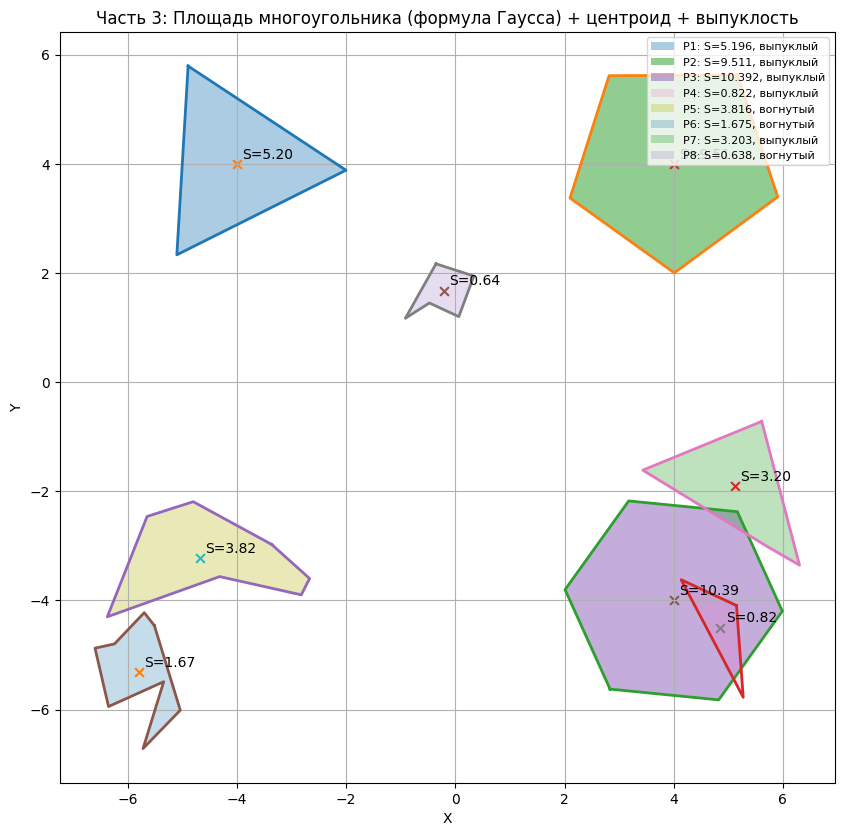

Проверка площади (Гаусс) vs (разбиение на треугольники):
P1: S=5.196, выпуклый | |Δ|=0.000000  OK (выпуклый)
P2: S=9.511, выпуклый | |Δ|=0.000000  OK (выпуклый)
P3: S=10.392, выпуклый | |Δ|=0.000000  OK (выпуклый)
P4: S=0.822, выпуклый | |Δ|=0.000000  OK (выпуклый)
P5: S=3.816, вогнутый | |Δ|=0.000000  вогнутый
P6: S=1.675, вогнутый | |Δ|=0.661559  вогнутый
P7: S=3.203, выпуклый | |Δ|=0.000000  OK (выпуклый)
P8: S=0.638, вогнутый | |Δ|=0.000000  вогнутый


In [ ]:
import random
import math
from dataclasses import dataclass
from typing import List, Optional, Tuple
import matplotlib.pyplot as plt


@dataclass(frozen=True)
class Point:
    x: float
    y: float

    def __str__(self):
        return f"({self.x:.2f}, {self.y:.2f})"


EPS = 1e-10


class Polygon:
    def __init__(self, vertices: List[Point]):
        if len(vertices) < 3:
            raise ValueError("Polygon must have at least 3 vertices.")
        self.vertices = vertices

    def __str__(self):
        return "Polygon[" + ", ".join(str(v) for v in self.vertices) + "]"

    def area_signed(self) -> float:
        """Подписанная площадь (может быть отрицательной в зависимости от обхода)."""
        vs = self.vertices
        s = 0.0
        n = len(vs)
        for i in range(n):
            x1, y1 = vs[i].x, vs[i].y
            x2, y2 = vs[(i + 1) % n].x, vs[(i + 1) % n].y
            s += x1 * y2 - x2 * y1
        return 0.5 * s

    def area(self) -> float:
        """Площадь по формуле Гаусса (шнуровки)."""
        return abs(self.area_signed())

    def is_convex(self) -> bool:
        """Проверка выпуклости по знакам векторных произведений последовательных рёбер."""
        vs = self.vertices
        n = len(vs)

        def cross(o: Point, a: Point, b: Point) -> float:
            # (a-o) x (b-o)
            return (a.x - o.x) * (b.y - o.y) - (a.y - o.y) * (b.x - o.x)

        sign = 0
        for i in range(n):
            c = cross(vs[i], vs[(i + 1) % n], vs[(i + 2) % n])
            if abs(c) < EPS:
                continue
            cur = 1 if c > 0 else -1
            if sign == 0:
                sign = cur
            elif cur != sign:
                return False
        return True

    def centroid(self) -> Point:
        """
        Центр масс (центроид) для полигона.
        Формула через суммирование по рёбрам (корректно для невырожденной площади).
        """
        vs = self.vertices
        n = len(vs)
        a2 = 0.0  # это 2*Area_signed
        cx = 0.0
        cy = 0.0

        for i in range(n):
            x1, y1 = vs[i].x, vs[i].y
            x2, y2 = vs[(i + 1) % n].x, vs[(i + 1) % n].y
            cross = x1 * y2 - x2 * y1
            a2 += cross
            cx += (x1 + x2) * cross
            cy += (y1 + y2) * cross

        if abs(a2) < EPS:
            # почти вырожденный — вернём среднее арифметическое вершин
            mx = sum(p.x for p in vs) / n
            my = sum(p.y for p in vs) / n
            return Point(mx, my)

        cx /= (3.0 * a2)
        cy /= (3.0 * a2)
        return Point(cx, cy)

    def triangulation_area(self) -> float:
        """
        Площадь через разбиение на треугольники "веером" от вершины 0.
        Для выпуклых полигонов должна совпадать с Гауссом (с точностью).
        """
        vs = self.vertices
        p0 = vs[0]

        def tri_area(a: Point, b: Point, c: Point) -> float:
            return abs((a.x * (b.y - c.y) + b.x * (c.y - a.y) + c.x * (a.y - b.y)) / 2.0)

        total = 0.0
        for i in range(1, len(vs) - 1):
            total += tri_area(p0, vs[i], vs[i + 1])
        return total

def generate_regular_polygon(sides: int, center: Point, radius: float) -> Polygon:
    ang0 = random.uniform(0, 2 * math.pi)
    verts = []
    for i in range(sides):
        t = ang0 + 2 * math.pi * i / sides
        verts.append(Point(center.x + radius * math.cos(t), center.y + radius * math.sin(t)))
    return Polygon(verts)


def generate_random_polygon(min_sides: int, max_sides: int,
                            xmin: float, xmax: float, ymin: float, ymax: float,
                            concave_prob: float = 0.45) -> Polygon:
    """
    Генерим полигон так:
    - выбираем центр
    - генерим углы по кругу + радиусы
    - сортируем по углу (получаем простой контур "звёздного типа" вокруг центра)
    - иногда делаем вогнутость: "вдавим" одну вершину ближе к центру
    """
    sides = random.randint(min_sides, max_sides)
    cx = random.uniform(xmin + 2, xmax - 2)
    cy = random.uniform(ymin + 2, ymax - 2)
    center = Point(cx, cy)

    # базовый масштаб
    base_r = random.uniform(0.8, 2.2)
    angles = sorted(random.uniform(0, 2 * math.pi) for _ in range(sides))

    verts = []
    for a in angles:
        r = base_r * random.uniform(0.6, 1.4)
        verts.append(Point(cx + r * math.cos(a), cy + r * math.sin(a)))

    poly = Polygon(verts)

    # Попробуем сделать вогнутым (не гарантируем 100%, но часто получится)
    if random.random() < concave_prob and len(verts) >= 4:
        idx = random.randrange(len(verts))
        v = verts[idx]
        # вдавим вершину к центру
        new_v = Point(cx + 0.25 * (v.x - cx), cy + 0.25 * (v.y - cy))
        verts2 = verts[:]
        verts2[idx] = new_v
        poly2 = Polygon(verts2)
        # оставим, если площадь не выродилась
        if poly2.area() > 1e-3:
            poly = poly2

    return poly


def generate_polygons(n: int, xmin: float, xmax: float, ymin: float, ymax: float,
                      min_sides: int = 3, max_sides: int = 8):
    for _ in range(n):
        yield generate_random_polygon(min_sides, max_sides, xmin, xmax, ymin, ymax)


def plot_polygon(ax, poly: Polygon, alpha: float = 0.5, label: Optional[str] = None):
    xs = [p.x for p in poly.vertices] + [poly.vertices[0].x]
    ys = [p.y for p in poly.vertices] + [poly.vertices[0].y]
    ax.plot(xs, ys, linewidth=2)
    ax.fill(xs, ys, alpha=alpha, label=label)


def main():
    random.seed(7)

    # область для генерации
    xmin, xmax, ymin, ymax = -8, 8, -8, 8

    # Набор полигонов: несколько правильных + несколько случайных
    polys: List[Polygon] = [
        generate_regular_polygon(3, Point(-4, 4), 2.0),
        generate_regular_polygon(5, Point(4, 4), 2.0),
        generate_regular_polygon(6, Point(4, -4), 2.0),
    ]
    polys += list(generate_polygons(5, xmin, xmax, ymin, ymax, min_sides=3, max_sides=8))

    fig, ax = plt.subplots(figsize=(10, 10))

    # Чтобы легенда была информативной
    legend_entries = []

    for i, poly in enumerate(polys, start=1):
        A = poly.area()
        conv = poly.is_convex()
        C = poly.centroid()
        triA = poly.triangulation_area()
        diff = abs(A - triA)

        poly_type = "выпуклый" if conv else "вогнутый"
        label = f"P{i}: S={A:.3f}, {poly_type}"

        alpha = 0.2 + min(0.4, A / 30.0)

        plot_polygon(ax, poly, alpha=alpha, label=label)
        ax.scatter([C.x], [C.y], s=40, marker="x")  # центроид

        # подпись площади рядом с центром
        ax.text(C.x + 0.1, C.y + 0.1, f"S={A:.2f}", fontsize=10)

        legend_entries.append((label, diff, conv))

    ax.set_title("Часть 3: Площадь многоугольника (формула Гаусса) + центроид + выпуклость")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True)
    ax.legend(loc="upper right", fontsize=8)
    plt.show()

    # Консольная проверка
    print("Проверка площади (Гаусс) vs (разбиение на треугольники):")
    for label, diff, conv in legend_entries:
        note = "OK (выпуклый)" if conv else "вогнутый"
        print(f"{label} | |Δ|={diff:.6f}  {note}")


if __name__ == "__main__":
    main()

# Прикладная задача
## Оценка площади озера по спутниковому снимку 

По результатам сегментации спутникового изображения береговая линия озера аппроксимирована многоугольником с вершинами в пиксельных координатах. Известно пространственное разрешение снимка (например, 1 пиксель = 2 м по обеим осям).

### Задача
- Перевести координаты вершин из пикселей в метры, умножив каждую координату на масштаб:  
  $x'_i = s_x * x_i,  y'_i = s_y * y_i$  (для квадратного пикселя s_x = s_y = s).
- С помощью формулы Гаусса вычислить площадь озера в квадратных метрах и гектарах:  
  $S = 1/2 * | Σ_{i=1}^{n} (x'_i y'_{i+1} - x'_{i+1} y'_i) |, где (x'_{n+1}, y'_{n+1}) = (x'_1, y'_1)$; затем S_га = S / 10 000.
- Сравнить полученную площадь с заданным порогом (например, 10 гектаров), чтобы классифицировать объект как «малое озеро» или «крупный водоём».


## Чтобы узнать вариант введите ваш номер в списке

In [3]:
print(int(input("Введите номер в списке: "))%6)

0


## Вариант 1: Озеро в Карелии (малый водоём)

**Название объекта:** Озеро Малое Круглое  
**Местоположение:** Республика Карелия  

**Координаты береговой линии (пиксели на снимке):**

[
(145, 87), (162, 76), (188, 81), (201, 94),
(208, 112), (194, 128), (172, 135), (151, 130),
(133, 117), (126, 101), (129, 89)
]

**Пространственное разрешение:** 1 пиксель = 1.5 метра  
**Порог классификации:** 5 гектаров (для малых озёр)  

---
## Вариант 2: Старица реки Волги

**Название объекта:** Старица "Подкова"  
**Местоположение:** Волго-Ахтубинская пойма, Астраханская область  

**Координаты (пиксели):**

[
(320, 180), (340, 165), (370, 160), (400, 165),
(420, 180), (435, 200), (440, 225), (430, 250),
(410, 265), (380, 270), (350, 260), (330, 240),
(315, 220), (310, 200)
]

**Пространственное разрешение:** 1 пиксель = 2.0 метра  
**Порог классификации:** 8 гектаров  

---

## Вариант 3: Городской пруд (искусственный водоём)

**Название объекта:** Парковый пруд "Зеркальный"  
**Местоположение:** Городской парк, Москва  

**Координаты (пиксели):**

[
(80, 120), (110, 100), (150, 95), (190, 105),
(220, 125), (235, 155), (220, 185), (190, 205),
(150, 210), (110, 200), (80, 180), (65, 150)
]

**Пространственное разрешение:** 1 пиксель = 0.5 метра (высокое разрешение)  
**Порог классификации:** 2 гектара (для городских объектов)  

---

## Вариант 4: Альпийское ледниковое озеро

**Название объекта:** Ледниковое озеро "Голубое"  
**Местоположение:** Кавказские горы, высота 2800 м  

**Координаты (пиксели):**

[
(50, 70), (85, 55), (125, 50), (165, 60),
(195, 80), (210, 110), (200, 145), (170, 170),
(130, 180), (90, 170), (60, 150), (40, 120),
(35, 95)
]

**Пространственное разрешение:** 1 пиксель = 4.0 метра (низкое разрешение горной съёмки)  
**Порог классификации:** 15 гектаров (горные озёра)  

---

## Вариант 5: Водохранилище на малой реке

**Название объекта:** Водохранилище "Приозерное"  
**Местоположение:** Смоленская область  

**Координаты (пиксели):**

[
(200, 100), (250, 80), (310, 85), (360, 105),
(400, 140), (420, 185), (405, 230), (360, 260),
(300, 270), (240, 250), (200, 220), (180, 180),
(175, 140), (185, 115)
]

**Пространственное разрешение:** 1 пиксель = 3.0 метра  
**Порог классификации:** 20 гектаров (водохранилища)  

---

## Вариант 6: Техногенный карьер, заполненный водой

**Название объекта:** Затопленный карьер "Северный"  
**Местоположение:** Кемеровская область, бывший угольный разрез  

**Координаты (пиксели):**

[
(90, 60), (130, 40), (180, 35), (230, 45),
(270, 70), (295, 105), (300, 145), (285, 185),
(250, 215), (200, 225), (150, 210), (110, 180),
(85, 140), (80, 100)
]

**Пространственное разрешение:** 1 пиксель = 2.5 метра  
**Порог классификации:** 10 гектаров (техногенные объекты)  


In [1]:
from dataclasses import dataclass
from typing import List, Tuple

# ---------- Модель ----------
@dataclass(frozen=True)
class Point:
    x: float
    y: float


class Polygon:
    def __init__(self, vertices: List[Point]):
        if len(vertices) < 3:
            raise ValueError("Polygon must have at least 3 vertices.")
        self.vertices = vertices

    def area(self) -> float:
        """Площадь по формуле Гаусса (шнуровка)."""
        s = 0.0
        n = len(self.vertices)
        for i in range(n):
            x1, y1 = self.vertices[i].x, self.vertices[i].y
            x2, y2 = self.vertices[(i + 1) % n].x, self.vertices[(i + 1) % n].y
            s += x1 * y2 - x2 * y1
        return abs(s) / 2.0


# ---------- Новые данные ----------
pixel_vertices: List[Tuple[int, int]] = [
    (220, 90), (245, 75), (280, 70), (310, 85),
    (330, 110), (325, 140), (300, 160), (260, 165),
    (230, 150), (200, 130), (195, 105)
]

scale_m_per_px = 1.8   # 1 пиксель = 1.8 метра (новое значение)
threshold_ha = 7.0    # новый порог в гектарах

# 1) Перевод: пиксели -> метры
meter_vertices = [Point(x * scale_m_per_px, y * scale_m_per_px) for x, y in pixel_vertices]

# 2) Площадь в м² и га
poly = Polygon(meter_vertices)
area_m2 = poly.area()
area_ha = area_m2 / 10_000

# 3) Классификация
kind = "малое озеро" if area_ha < threshold_ha else "крупный водоём"

# ---------- Вывод ----------
print('Объект: Озеро "Лесная Гладь" (Карелия)')
print(f"Площадь: {area_m2:.3f} м²")
print(f"Площадь: {area_ha:.6f} га")
print(f"Классификация (порог {threshold_ha} га): {kind}")

Объект: Озеро "Лесная Гладь" (Карелия)
Площадь: 29403.000 м²
Площадь: 2.940300 га
Классификация (порог 7.0 га): малое озеро
